# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент гр. 9381 Шахин Никита Вариант 65.

## Цель работы:
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.
***
## Основные теоретические положения.

### Бинарный метод

Бинарный метод - один из методов быстрого возвеления числа в степень ***n $\in \mathbb{N}$***. В данном методе степень представляется в бинарном виде. Проходим по двоичной записи, не учитывая смый левый бит. Если бит равен 0, то основание возводится в квадрат, если бит равен 1, то число возводится в квадарт, а затем умножается само на себя. Количество операций рассчитывается по формуле: $\lambda (n)+ \nu(n) - 1$, где $\lambda (n)$ - уменьшенная на 1 длина двоичной записи числа ***n*** ($\left\lfloor\log_2 n \right\rfloor$), $\nu(n)$ - вес хэминга (число не нулевых цифр в записи числа).

### Метод множителей

Метод множителей - один из методов быстрого возведения числа в степень ***n $\in \mathbb{N}$***. В данном методе степень ***n*** представляется как произведение двух чисел ***n = i $\cdot$ j***, где ***i - наименьший простой множитель числа n, а j > 1***. Сначала число возводится в степень i, затем результат возводится в степень j. В результате получится необходимое возведение в степень n. Если число n - простое, то на множители i и j раскладывается число n-1, число возводится в эту степень и домножается само на себя, чтобы получилось возведение в степень n.

### Определение аддитивной цепочки.

Аддитивной цепочкой для числа ***n $\in \mathbb{N}$*** называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, где $a_i = a_j + a_k, k \leqslant j < i, i = 1..n$. $l(n)$ - минимальная длина аддитивной цепочки. 
$\forall n \leqslant 1000$ справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где 
$l_p = \begin{cases} \infty \text{, если p - простое число}  \\ l(q) + l(\frac{p}{q}) \text{, если q - минимальный простой делитель числа p} \end{cases}$, $\delta_n\in\{0, 1\}$

### Теорема Брауера

Для некторого $k < log_2 log_2 n$ справедливо неравенство: $l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

Следствия при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:

Следствие 1: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

Следствие 2: Наилучшая верхняя оценка для l(n) имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$

### Типы шагов аддитивной цепочки

Если $a_i < a_{i+1}$, то равенство $a_i = a_j+a_k$, $i = 1..m$, $0\leqslant k\leqslant j < i$ называется шагом аддитивной цепочки.

Шаги:
- Удвоение, если j=k=i-1 $a_i = 2 * a_{i-1}$
- Звёздный, если j = i-1, k = 0..i-1
- Малый шаг, если $\lambda(a_i) = \lambda(a_{i-1})$

### Алгоритм Брауера

Алгоритм Брауера вычисляет n нную стпенень за $\lambda(n)+\frac{(1+o(1))\lambda(n)}{\lambda(\lambda(n))}$ операций.

Для некоторых n, k Брауерские цепочки задаются в виде рекурентной формулы: $B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, если } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ если } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}$

### Звёздная цепочка. Гипотеза Шольца-Брауэра

Звёздная цепочка - цепочка которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $

$l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

Гипотеза Шольца-Брауера: $l^*(2^n-1)\leqslant l^*(n)+n-1$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов является точным алгоритмом и находит минимальную звёздную цепочку для числа $ n $.

Введём определение вектора индексов: $\exists \text{ звёздная цепочка } l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно задать вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$. Шаг звёздной цепочки можно переписать следуюшим образом: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответсвует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. Наименьшая звёздная цепочка  $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответсвует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$


Нахождение минимальной длины звёздной цепочки происходит с помощью перебора. Вектор индексов разбивается на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{min} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{max} = a_{q+1}+m-q$.


#### Алгоритм

Векток индексов разбивается на фиксированный и меняющийся. Вычисляется $a_{min}\text{ и }a_{max}$. Если $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему фиксированному вектору. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается. Длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$
***
## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

### Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $x^n$,где $n \geqslant 30$, для 2-3 значений $n$(значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geqslant 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leqslant 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. _Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность_
***
## Выполнение работы
### 1. Бинарный метод и метод множителей
Возьмём $n = 33, 35, 39, 63$

#### Возведение числа $x$ в степень $n=33$:

**Бинарный метод:**

$33_{10} = 100001_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x^8 = x^{16},\ x^{16}\cdot x^{16} = x^{32},\  x^{32}\cdot x = x^{33}$.

_Количество операций:_ $\lambda (33)+ \nu(33) - 1 = 5+2-1 = 6$

**Метод множителей:**

$33 = 3\cdot 11$.

$x^{33} = {(x^3)}^{11}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y^2 = y^4,\ y^4\cdot y = y^5,\ y^5\cdot y^5 = y^{10},\ y^{10}\cdot y = y^{11}$

_Количество операций:_ 7

#### Возведение числа $x$ в степень $n=35$:

**Бинарный метод:**

$35_{10} = 100011_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x^8 = x^{16},\ x^{16}\cdot x = x^{17},\  x^{17}\cdot x^{17} = x^{34},\ x^{34}\cdot x = x^{35}$

_Количество операций:_ $\lambda (35)+ \nu(35) - 1 = 5+3-1 = 7$

**Метод множителей:**

$35 = 5\cdot 7$.

$x^{35} = {(x^5)}^7$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x = x^5,\ x^5=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y = y^3,\ y^3\cdot y^3 = y^6,\ y^6\cdot y = y^7$

_Количество операций:_ 7

#### Возведение числа $x$ в степень $n=39$:

**Бинарный метод:**

$39_{10} = 100111_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x^2 = x^4,\ x^4\cdot x^4 = x^8,\ x^8\cdot x = x^9,\ x^9\cdot x^9 = x^{18},\ x^{18}\cdot x = x^{19},\ x^{19}\cdot x^{19} = x^{38},\ x^{38}\cdot x = x^{39}$

_Количество операций:_ $\lambda (39)+ \nu(39) - 1 = 5+4-1 = 8$

**Метод множителей:**

$39 = 3\cdot 13$.

$x^{39} = {(x^3)}^{13}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y = y^3,\ y^3\cdot y^3 = y^6,\ y^6\cdot y^6 = y^{12},\ y^{12}\cdot y = y^{13}$

_Количество операций:_ 7

#### Возведение числа $x$ в степень $n=63$:

**Бинарный метод:**

$63_{10} = 111111_2$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3\cdot x^3 = x^6,\ x^6\cdot x = x^7,\ x^7\cdot x^7 = x^{14},\ x^{14}\cdot x = x^{15},\ x^{15}\cdot x^{15} = x^{30},\ x^{30}\cdot x = x^{31},\ x^{31}\cdot x^{31} = x^{62},\ x^{62}\cdot x = x^{63}$

_Количество операций:_ $\lambda (63)+ \nu(63) - 1 = 5+6-1 = 10$

**Метод множителей:**

$63 = 7\cdot 9$.

$x^{63} = {(x^7)}^{9}$

$x,\ x\cdot x = x^2,\ x^2\cdot x = x^3,\ x^3\cdot x^3 = x^6,\ x^6\cdot x = x^7,\ x^7=y$

$y,\ y\cdot y = y^2,\ y^2\cdot y^2 = y^4,\ y^4\cdot y^4 = y^8,\ y^8\cdot y = y^9$

_Количество операций:_ 8

#### Результаты возведения в степень:

|n|Число операций БМ|Число операций ММ|
|:-:|:-:|:-:|
|33|6|7|
|35|7|7|
|39|8|7|
|63|10|8|

***
#### Вывод:

Исследование показало, что при $n = 2^k-1$ метод множителей гарантированно эффективнее бинарного метода. Однако при $n = 2^k+1$ бинарный метод превосходит метод множителей. В остальных случаях метод множителей выполняется за такое же число операций или быстрее.

### 2. Алгоритм Брауера

Реализован алгоритм Брауера для вычисления приближённой аддитивной цепочки.

In [96]:
def Brauer_func(n, k, Bn):
    if(n < 2**k):
        for i in range(1, 2**k):
            Bn.append(i)
        return    
    elif(n >=2**k):
        q = n//(2**k)
        Brauer_func(q, k, Bn)
        for i in range(1, k+1):
            q*=2
            Bn.append(q)    
        Bn.append(n)    
Bn = []
n = int(input("Введите n: "))
k = int(input("Введите k: "))
Brauer_func(n, k, Bn)
print(Bn)
print("Длина аддитивной цепочки: ", len(Bn))

Введите n: 2356
Введите k: 2
[1, 2, 3, 4, 8, 9, 18, 36, 36, 72, 144, 147, 294, 588, 589, 1178, 2356, 2356]
Длина аддитивной цепочки:  18


Алгоритм был применён к следующим числам: $98, 524, 762, 2356, 27182$

Минимальные цепочки и их длины:

|n|Минимальная длина|Минимальная аддитивная цепочка|
|:-:|:-:|:-:|
|98|9|1 2 3 6 12 24 48 49 98|
|524|12|1 2 4 8 16 32 64 65 130 131 262 524|
|762|13|1 2 3 5 10 13 23 46 92 184 368 381 762|
|2356|15|1 2 3 6 9 18 36 72 144 147 294 588 589 1178 2356|
|27182|19|1 2 3 5 10 20 23 43 53 106 212 424 848 1696 3392 6784 13568 13591 27182|

Результаты алгоритма Брауера для $n=98$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|13|[1, 2, 3, 6, 6, 12, 12, 24, 24, 48, 49, 98, 98]|
|2|12|[1, 2, 3, 2, 4, 6, 12, 24, 24, 48, 96, 98]|
|3|13|[1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 12, 24, 48, 96, 98]|
|4|20|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 12, 24, 48, 96, 98]|

Результаты алгоритма Брауера для $n=524$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|19|[1, 2, 2, 4, 4, 8, 8, 16, 16, 32, 32, 64, 65, 130, 131, 262, 262, 524, 524]|
|2|15|[1, 2, 3, 4, 8, 8, 16, 32, 32, 64, 128, 131, 262, 524, 524]|
|3|19|[1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 8, 16, 32, 64, 65, 130, 260, 520, 524]|
|4|25|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 32, 64, 128, 256, 512, 524]|

Результаты алгоритма Брауера для $n=762$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|19|[1, 2, 2, 4, 5, 10, 11, 22, 23, 46, 47, 94, 95, 190, 190, 380, 381, 762, 762]|
|2|15|[1, 2, 3, 4, 8, 11, 22, 44, 47, 94, 188, 190, 380, 760, 762]|
|3|19|[1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 11, 22, 44, 88, 95, 190, 380, 760, 762]|
|4|25|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 47, 94, 188, 376, 752, 762]|

Результаты алгоритма Брауера для $n=2356$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|23|[1, 2, 2, 4, 4, 8, 9, 18, 18, 36, 36, 72, 73, 146, 147, 294, 294, 588, 589, 1178, 1178, 2356, 2356]|
|2|18|[1, 2, 3, 4, 8, 9, 18, 36, 36, 72, 144, 147, 294, 588, 589, 1178, 2356, 2356]|
|3|19|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 36, 72, 144, 288, 294, 588, 1176, 2352, 2356]|
|4|25|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 36, 72, 144, 147, 294, 588, 1176, 2352, 2356]|

Результаты алгоритма Брауера для $n=27182$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|29|[1, 2, 3, 6, 6, 12, 13, 26, 26, 52, 53, 106, 106, 212, 212, 424, 424, 848, 849, 1698, 1698, 3396, 3397, 6794, 6795, 13590, 13591, 27182, 27182]|
|2|24|[1, 2, 3, 2, 4, 6, 12, 24, 26, 52, 104, 106, 212, 424, 424, 848, 1696, 1698, 3396, 6792, 6795, 13590, 27180, 27182]|
|3|23|[1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 53, 106, 212, 424, 424, 848, 1696, 3392, 3397, 6794, 13588, 27176, 27182]|
|4|30|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 12, 24, 48, 96, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 13584, 27168, 27182]|

####Вывод

Как видно из таблиц алгоритм Брауера не даёт минимальную аддитивную цепочку. Наибольшее приближение к минимальной аддитивной цепочке происходит при $k = \lambda(\lambda(n))$. С увеличением $k$ длина аддитивной цеопчки растёт. Это происходит потому что число $2^k$ увеличивается, следовательно увеличивается количество элементов в цепочке от $1$ до $2^k$.

Также можно заметить, что в аддитивных цепочках присутствуют повторяющиеся элементы. Это происходит, когда $n = 2^k\cdot q$ и когда в цепочку добавляется $2q \text{ если } q < 2^{k-1}, 4q \text{ если } q < 2^{k-2}, ...$. Для улучшения алгоритма такие ситуации были исключены.

####Улучшенный алгоритм

In [123]:
def Brauer_func_imp(n, k, Bn):
    if(n < 2**k):
        for i in range(1, 2**k):
            Bn.append(i)
        return    
    elif(n >=2**k):
        q = n//(2**k)
        q1=q
        Brauer_func_imp(q, k, Bn)
        for i in range(1, k+1):
            q*=2
            if(not(q1<2**(k-i))):
                Bn.append(q)
        if n!= q:    
            Bn.append(n)    
Bn = []
n = int(input("Введите n: "))
k = int(input("Введите k: "))
Brauer_func_imp(n, k, Bn)
print(Bn)
print("Длина аддитивной цепочки: ", len(Bn))

Введите n: 27182
Введите k: 2
[1, 2, 3, 4, 6, 12, 24, 26, 52, 104, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 6795, 13590, 27180, 27182]
Длина аддитивной цепочки:  22


Результаты улучшенного алгоритма Брауера для чисел: $98, 524, 762, 2356, 27182$

Результаты улучшенного алгоритма Брауера для $n=98$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|9|[1, 2, 3, 6, 12, 24, 48, 49, 98]|
|2|10|[1, 2, 3, 4, 6, 12, 24, 48, 96, 98]|
|3|13|[1, 2, 3, 4, 5, 6, 7, 8, 12, 24, 48, 96, 98]|

Результаты улучшенного алгоритма Брауера для $n=524$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|12|[1, 2, 4, 8, 16, 32, 64, 65, 130, 131, 262, 524]|
|2|12|[1, 2, 3, 4, 8, 16, 32, 64, 128, 131, 262, 524]|
|3|16|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 65, 130, 260, 520, 524]|

Результаты улучшенного алгоритма Брауера для $n=762$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|16|[1, 2, 4, 5, 10, 11, 22, 23, 46, 47, 94, 95, 190, 380, 381, 762]|
|2|15|[1, 2, 3, 4, 8, 11, 22, 44, 47, 94, 188, 190, 380, 760, 762]|
|3|17|[1, 2, 3, 4, 5, 6, 7, 8, 11, 22, 44, 88, 95, 190, 380, 760, 762]|

Результаты улучшенного алгоритма Брауера для $n=2356$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|16|[1, 2, 4, 8, 9, 18, 36, 72, 73, 146, 147, 294, 588, 589, 1178, 2356]|
|2|16|[1, 2, 3, 4, 8, 9, 18, 36, 72, 144, 147, 294, 588, 589, 1178, 2356]|
|3|19|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 36, 72, 144, 288, 294, 588, 1176, 2352, 2356]|

Результаты улучшенного алгоритма Брауера для $n=27182$

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|1|22|[1, 2, 3, 6, 12, 13, 26, 52, 53, 106, 212, 424, 848, 849, 1698, 3396, 3397, 6794, 6795, 13590, 13591, 27182]|
|2|22|[1, 2, 3, 4, 6, 12, 24, 26, 52, 104, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 6795, 13590, 27180, 27182]|
|3|22|[1, 2, 3, 4, 5, 6, 7, 12, 24, 48, 53, 106, 212, 424, 848, 1696, 3392, 3397, 6794, 13588, 27176, 27182]|
|4|29|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 48, 96, 106, 212, 424, 848, 1696, 1698, 3396, 6792, 13584, 27168, 27182]|

####Общий вывод

После улучшения алгоритма можно заметить, что при $k = 1$ улучшенный алгоритм Брауера работает как бинарный метод. После удаления повторяющихся элементов алгоритм выдаёт минимальную цепочку для не больших чисел при $k = \lambda(\lambda(n))$. В остальных случаях наибольшее приближение получается также при $k = \lambda(\lambda(n))$. С ростом $n$ длина цепочки Брауера и минимальной аддитивной цепочки будет расходиться. Также с увеличением $k$ длина аддитивной цеопчки растёт.

###3. Алгоритм дробления вектора индексов

Реализован алгоритм дробления индексов для нахождения минимальной аддитивной цепочки для числа $n$

In [121]:
import math
import time

def dec_index_vec(index_vec, start_index=1):
    current_max_index = start_index + len(index_vec) - 1
    for i in range(1, len(index_vec) + 1):
        index_vec[-i] -= 1
        if index_vec[-i] == 0:
            if i == len(index_vec):
                index_vec.append(1)
                for j in range(len(index_vec)):
                    index_vec[j] = j + start_index
                break
            index_vec[-i] = current_max_index
            current_max_index -= 1
        else:
            break


def make_chain_from_fix_vec(ri_fix):
    add_chain = [1]
    for index in ri_fix:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain


def make_chain_from_vector(ri_fix, ri_change):
    add_chain = [1]
    for index in ri_fix:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    for index in ri_change:
        add_chain.append(add_chain[-1] + add_chain[index - 1])
    return add_chain


def lambd(n):
    return int(math.log2(n))


def nu(n):
    return bin(n).count('1')


def splitting_index_vector(n):
    m = lambd(n)
    upborder = lambd(n) + nu(n) - 1
    if m == math.log2(n):
        m -= 1
    while m <= upborder:
        q = m // 2
        if q == 0:
            q = 1
        ri_fix = [i for i in range(1, q + 1)]
        while (len(ri_fix) == q):
            ri_change = [q + i for i in range(1, (m - q + 1))]
            add_chain = make_chain_from_fix_vec(ri_fix)
            a_max = add_chain[q] * 2 ** (m - q)
            a_min = add_chain[q] + m - q
            if (n == a_max):
                return make_chain_from_vector(ri_fix, ri_change)
            if (n == a_min):
                ri_change = [1 for i in range((m - q))]
                return make_chain_from_vector(ri_fix, ri_change)
            if n < a_min or n > a_max:
                dec_index_vec(ri_fix)
                continue
            while (len(ri_change) == m - q):
                add_chain = make_chain_from_vector(ri_fix, ri_change)
                if (add_chain[-1] == n):
                    return add_chain
                dec_index_vec(ri_change, q + 1)
            dec_index_vec(ri_fix)
        m += 1

n = int(input("Введите n: "))
start = time.time()
add_chain = splitting_index_vector(n)
end = time.time()
print("время выполнения:", end - start, "секунд")
print("Цепочка: ", add_chain)
print("Длина: ", len(add_chain))

Введите n: 834
время выполнения: 148.4280617237091 секунд
Цепочка:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 832, 834]
Длина:  13


В таблице приведены минимальные аддитивные цепочки для числа $n$, их длина и время нахождения алгоритмом дробления вектора индексов.

|n|длина|цепочка|время|
|:-:|:-:|:-:|:-:|
|501|13|[1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501]|68.382 секунд|
|523|13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 520, 522, 523]|61.066 секунд|
|762|13|[1, 2, 4, 8, 16, 32, 34, 66, 132, 166, 298, 596, 762]|47.387 секунд|
|834|13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 832, 834]|148.428 секунд|
|1252|14|[1, 2, 4, 8, 16, 32, 64, 128, 256, 384, 416, 832, 1248, 1252]|645.629 секунд|

Дины минимальных цепочек полученые с помощью реализованного алгоритма совпадают с данными из интернета.

Сравнение длин аддитивных цепочек для $n$ посчитанных различными алгоритмами

|n|Алгоритм дробления вектора индексов|Алгоритм Брауера|Улучшенный алгоритм Брауера|Бинарный метод|Метод моножителей|
|:-:|:-:|:-:|:-:|:-:|
|501|13|15|14|15|14|
|523|13|15|13|13|14|
|762|13|15|15|16|14|
|834|13|15|13|13|15|
|1252|14|18|16|16|15|

####Вывод

Из первой таблицы видно, что для нахождения минимальной аддитивной цепочки методом дробления индексов требуется много времени. С увеличением $n$ растёт время поиска. Из второй таблицы видно, что из предыдущих методов самый эффективный - метод множителей. Самый не эффективный - Алгоритм Брауера. Однако улучшенный алгоритм брауера эффективнее, чем бинарный метод. Можно сделать вывод, что для быстрых подсчётов подходят приближённые методы, а для точного подсчёта - метод дробления вектора индексов.

###4. Проверка следствия теоремы Брауера

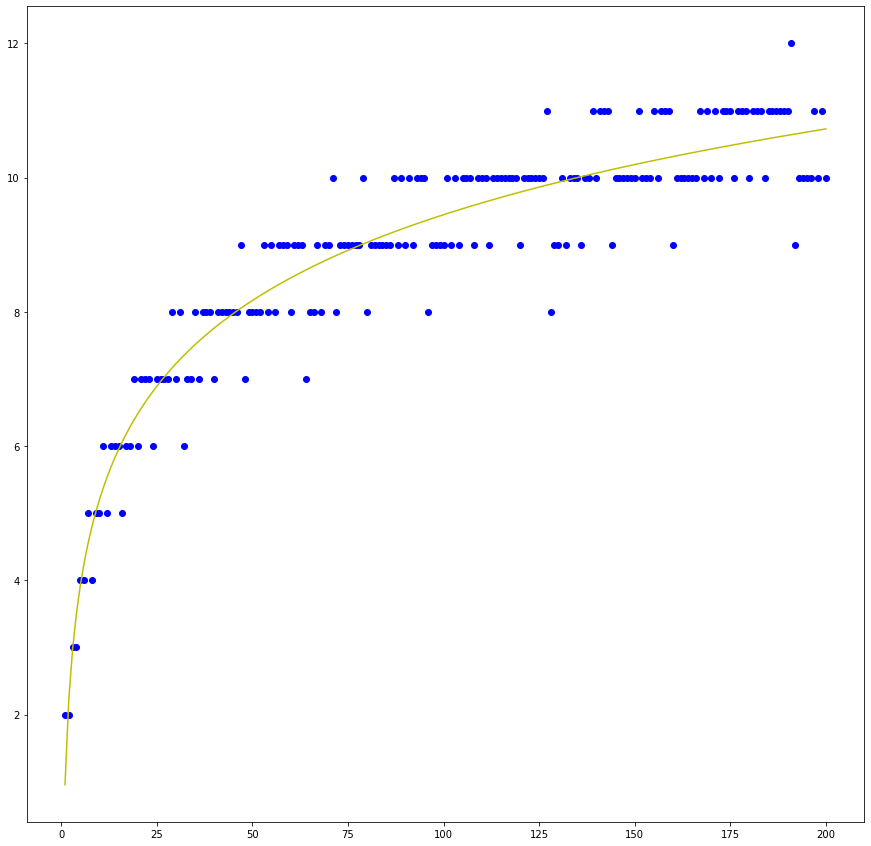

In [114]:
import pylab as plt
    
n=[]
l=[]
for i in range(1,201):
    n.append(i)
    l.append(len(splitting_index_vector(i)))        
plt.figure(figsize=(15, 15))
plt.scatter(n, l, color='b', marker='o')
m = matrix([[sum([float((log(i)**2)) for i in n]), sum([float(log(i)) for i in n])], [sum([float(log(i)) for i in n]), len(n)]])
vec = vector([sum([float(l[i] * log(n[i])) for i in range(len(n))]), sum(l)])
solution = m.solve_right(vec)
plt.plot(n, [solution[0] * log(i) + solution[1] for i in n], color = 'y')
plt.show()

####Вывод
Из графика видно, что функция $l(n)$ апроксимируется логарифмической кривой. Это подтверждает следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$. С увеличением $n,\ l(n)$  будет увеличиваться как логарифмическая функция. Поэтому $l(n)$ и $\lambda(n)$ будут эквивалентны на бесконечности.

###5. Проверка гипотезы Шольца-Брауэра

In [119]:
for i in range(2, 11):
    print("n = {}, {} <= {}".format(i, len(splitting_index_vector(2 ** i -  1)), len(splitting_index_vector(i))+i-1))

n = 2, 3 <= 3
n = 3, 5 <= 5
n = 4, 6 <= 6
n = 5, 8 <= 8
n = 6, 9 <= 9
n = 7, 11 <= 11
n = 8, 11 <= 11
n = 9, 13 <= 13
n = 10, 14 <= 14


В таблице приведены значения $l^*(2^n-1)$ и $l^*(n) + n - 1$ для $n \in (1, 10]$

| Значение $n$ | $ l^*(2^n-1) $ | $ l^*(n) + n - 1 $ |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

####Вывод
Из полученных данных видно что, гипотеза Шольца-Брауэра справедлива для $n \leq 10$.

***

## Вывод по практической работе
1. Сформировано представление о аддитивных цепочках.

2. Реализованы и применены следующие алгоритмы составления аддитивных цепочек:
    - Бинарный метод
    - Метод множителей
    - Алгоритм Брауера
    - Алгоритм дробления вектора индексов

3. Проверено следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$ на $n=1..200$. 

4. Была проверена гипотеза Шольца-Брауэра $l^*(2^n-1)\leqslant l^*(n)+n-1$ на $n \in (1, 10]$. 